In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [3]:
#CHECKING NULL VALUES
df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

<Axes: title={'center': 'Revenue vs Price generated by skincare'}, xlabel='Price', ylabel='Revenue generated'>

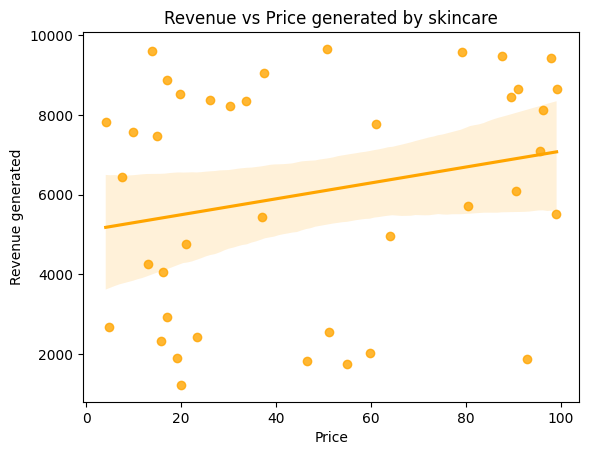

In [4]:
#RELATIONSHIP BETWEEN PRICE OF PRODUCTS AND REVENUE GENERATED BY THEM
df['Product type'].value_counts()
plt.title('Revenue vs Price generated by skincare')
sns.regplot(data=df[df['Product type']=='skincare'],x='Price',y='Revenue generated',color='orange')

<Axes: title={'center': 'Revenue vs Price generated by cosmetics'}, xlabel='Price', ylabel='Revenue generated'>

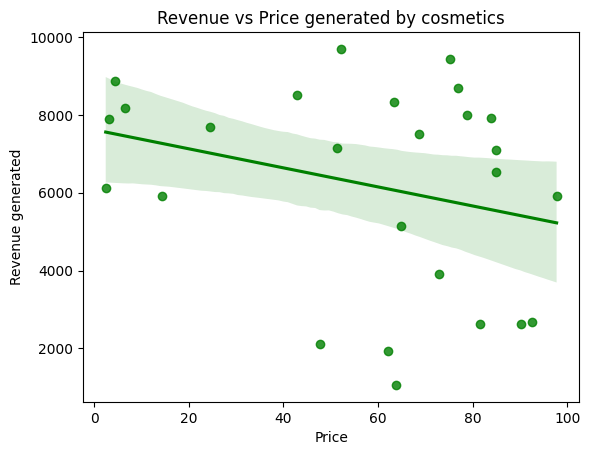

In [5]:
plt.title('Revenue vs Price generated by cosmetics')
sns.regplot(data=df[df['Product type']=='cosmetics'],x='Price',y='Revenue generated',color='green')

<Axes: title={'center': 'Revenue vs Price generated by haircare'}, xlabel='Price', ylabel='Revenue generated'>

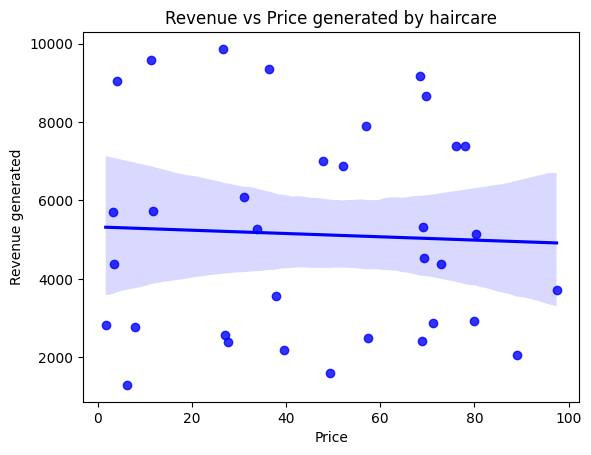

In [6]:
plt.title('Revenue vs Price generated by haircare')
sns.regplot(data=df[df['Product type']=='haircare'],x='Price',y='Revenue generated',color='blue')

<Axes: xlabel='Price', ylabel='Revenue generated'>

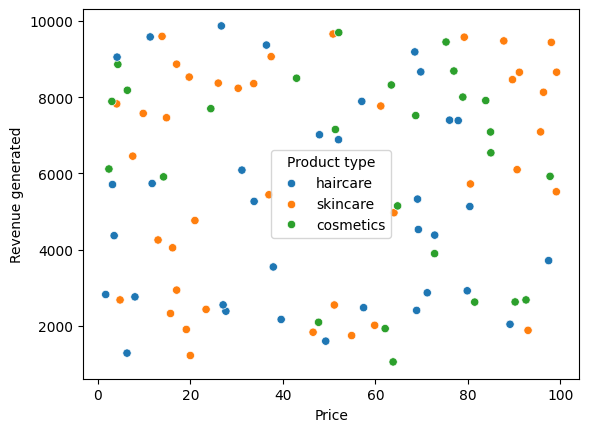

In [7]:
sns.scatterplot(data=df,x='Price',y='Revenue generated',hue='Product type')

In [8]:

product_wise_revenue=df.groupby('Product type')['Revenue generated'].sum().to_frame()
product_wise_revenue

,Revenue generated
Product type,
cosmetics,161521.265999
haircare,174455.390605
skincare,241628.162133


Text(0.5, 1.0, 'Product wise revenue generated')

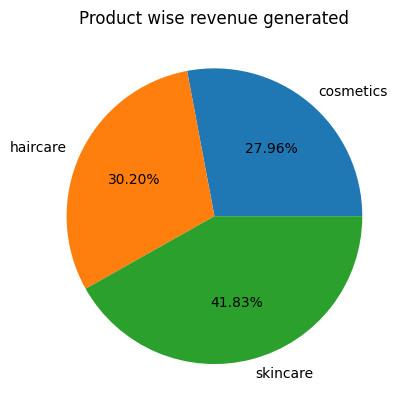

In [9]:
plt.pie(product_wise_revenue['Revenue generated'],labels=product_wise_revenue.index,autopct='%1.2f%%')
plt.title('Product wise revenue generated')

In [10]:
carrier_wise_revenue=df.groupby('Shipping carriers')['Revenue generated'].sum().to_frame()
carrier_wise_revenue

,Revenue generated
Shipping carriers,
Carrier A,142629.994607
Carrier B,250094.646988
Carrier C,184880.177143


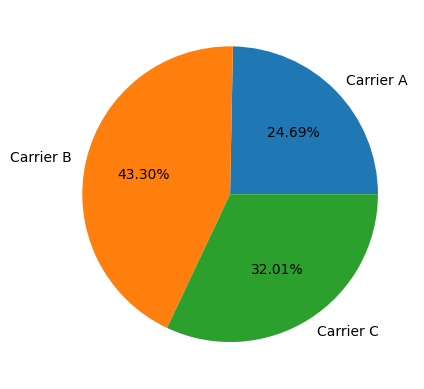

In [11]:
plt.pie(carrier_wise_revenue['Revenue generated'],labels=carrier_wise_revenue.index,autopct='%1.2f%%')
plt.show()

In [13]:
#AVERAGE LEAD TIME AND AVERAGE MANUFACTURING COST FOR ALL PRODUCTS OF COMPANY
product_wise_avg_lead_time=df.groupby('Product type')['Lead time'].mean().to_frame()
product_wise_avg_lead_time

,Lead time
Product type,
cosmetics,13.538462
haircare,18.705882
skincare,18.000000


In [14]:
#AVERAGE MANUFACTURING COST PRODUCT WISE
product_wise_avg_manufacturing_cost=df.groupby('Product type')['Manufacturing costs'].mean().to_frame()
product_wise_avg_manufacturing_cost

,Manufacturing costs
Product type,
cosmetics,43.052740
haircare,48.457993
skincare,48.993157


<Axes: xlabel='SKU', ylabel='Revenue generated'>

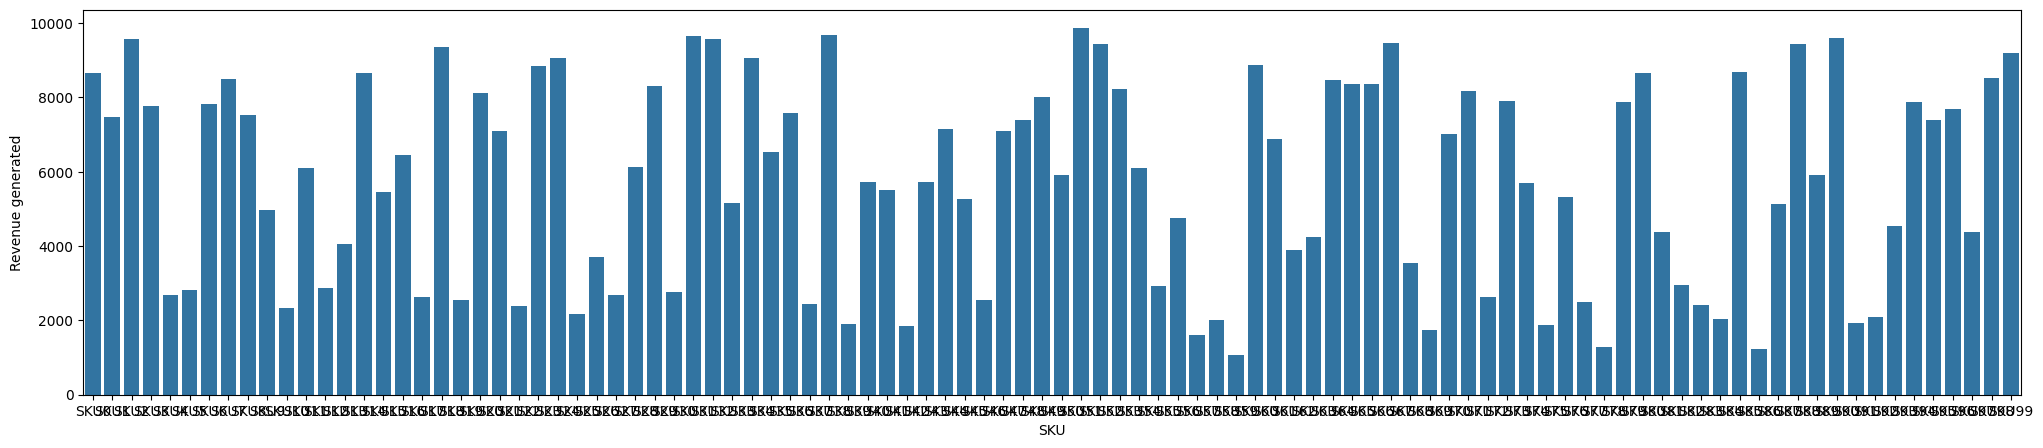

In [15]:
#ANALYSING SKUs(STOCK KEEPING UNITS)
#REVENUE GENERATED BY EACH SKU
plt.figure(figsize=(25,5))
sns.barplot(data=df,x='SKU',y='Revenue generated')

<Axes: xlabel='SKU', ylabel='Order quantities'>

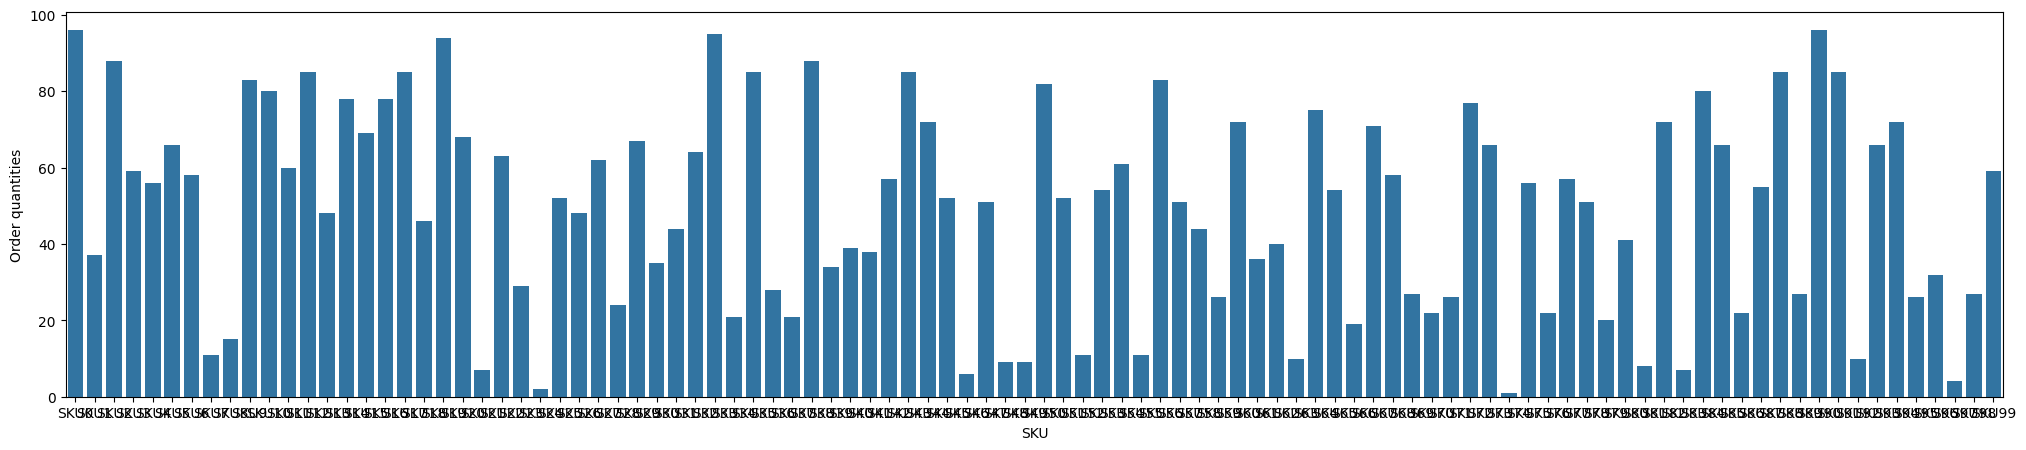

In [16]:
#ORDER QUANTITY OF EACH SKU
plt.figure(figsize=(25,5))
sns.barplot(data=df,x='SKU',y='Order quantities')

COST ANALYSIS

<Axes: xlabel='Shipping carriers', ylabel='Shipping costs'>

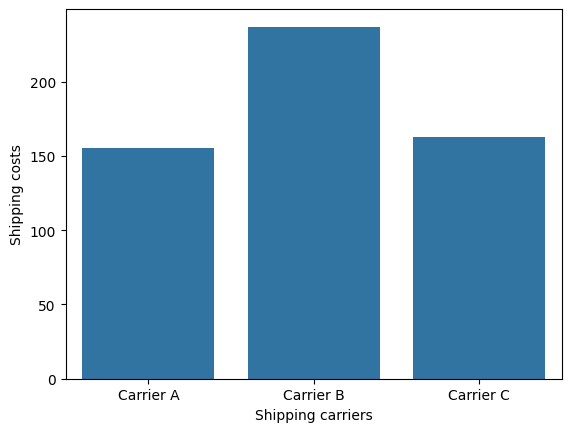

In [17]:
#SHIPPING COST OF CARRIERS
carrier_wise_shipping_cost=df.groupby('Shipping carriers')['Shipping costs'].sum().to_frame()
carrier_wise_shipping_cost
sns.barplot(data=carrier_wise_shipping_cost,x=carrier_wise_shipping_cost.index,y='Shipping costs')

<Axes: xlabel='Transportation modes', ylabel='Shipping costs'>

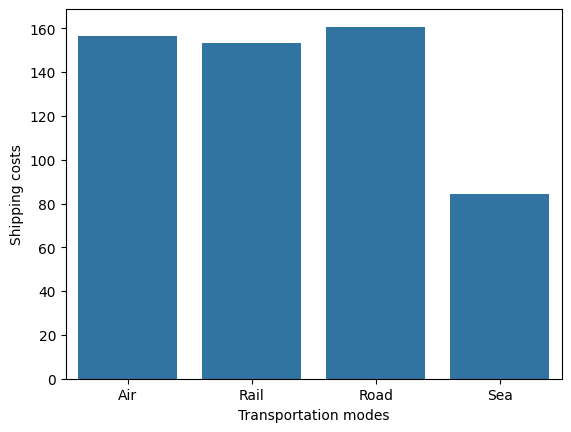

In [18]:
#COST DISTRIBUTION BY TRANSPORTATION MODES
transportation_wise_cost=df.groupby('Transportation modes')['Shipping costs'].sum().to_frame()
transportation_wise_cost
sns.barplot(data=transportation_wise_cost,x=transportation_wise_cost.index,y='Shipping costs')

DEFECT RATES

<Axes: xlabel='Product type', ylabel='Defect rates'>

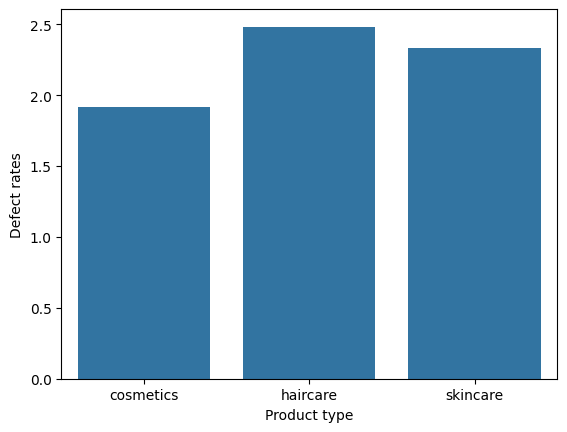

In [19]:
#AVERAGE DEFECT RATES OF ALL PRODUCT TYPES
product_wise_avg_defect_rates=df.groupby('Product type')['Defect rates'].mean().to_frame()
sns.barplot(data=product_wise_avg_defect_rates,x=product_wise_avg_defect_rates.index,y='Defect rates')

<Axes: xlabel='Transportation modes', ylabel='Defect rates'>

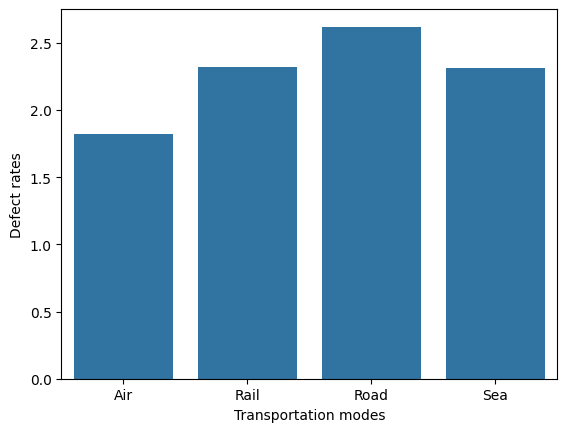

In [20]:
transportation_wise_defect_rates=df.groupby('Transportation modes')['Defect rates'].mean().to_frame()
sns.barplot(data=transportation_wise_defect_rates,x=transportation_wise_defect_rates.index,y='Defect rates')